# Declaration of Originality

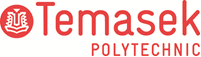

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Loh Yi Xuan (2404544E)
* Tutorial Group                : T04
* Tutor						    : Mr. Emile Sabastian
* Submission Date               : 11 Feb 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

**Note About Project Structure**

This notebook contains the complete and finalized analysis for the Machine Learning project. All data preprocessing, exploratory data analysis (EDA), feature engineering, model training, hyperparameter tuning, and evaluation are performed within this single notebook to ensure transparency and reproducibility.

# Libraries

In [111]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding
Goal: To predict a student's final score based on their AI usage patterns (Time, Dependency, Tools) and traditional study factors (Consistency, Sleep, Study Hours). By identifying which factors most significantly impact performance, educational institutions can provide better guidance on the using AI in learning.

# 2. Data Understanding

## 2.1 Load dataset

In [112]:
## Read *.csv file into pandas DataFrame
FILE_PATH = 'ai_impact_student_performance_dataset.csv'
df = pd.read_csv(FILE_PATH)
df 

,student_id,age,gender,grade_level,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_tools_used,ai_usage_purpose,ai_dependency_score,...,concept_understanding_score,study_consistency_index,improvement_rate,sleep_hours,social_media_hours,tutoring_hours,class_participation_score,final_score,passed,performance_category
0,1,20,Female,1st Year,2.5,1,170,NaN,Exam Prep,10,...,4,9.0,8.1,7.2,1.5,4.6,6,36.8,0,Low
1,2,17,Male,12th,3.4,1,123,NaN,Notes,4,...,8,8.5,13.8,7.6,5.1,2.7,6,65.5,1,Medium
2,3,24,Male,3rd Year,0.8,0,35,Copilot,Doubt Solving,8,...,7,2.1,39.1,5.7,0.2,4.0,3,66.3,1,Medium
3,4,21,Female,12th,4.4,0,45,ChatGPT+Gemini,Notes,3,...,5,6.7,25.2,8.2,4.2,2.9,2,69.5,1,Medium
4,5,18,Other,3rd Year,3.5,1,21,ChatGPT+Gemini,Coding,2,...,5,5.4,2.7,8.7,0.2,2.9,2,49.7,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,23,Male,3rd Year,3.0,0,178,Gemini,NaN,6,...,5,8.1,19.2,8.3,1.9,1.0,10,49.7,1,Low
7996,7997,21,Other,1st Year,3.3,0,63,Claude,Exam Prep,10,...,6,5.7,3.0,5.0,1.3,2.9,5,58.4,1,Medium
7997,7998,24,Male,3rd Year,1.6,0,113,ChatGPT,Coding,5,...,6,4.5,-18.0,5.0,3.5,0.1,9,69.1,1,Medium
7998,7999,22,Female,2nd Year,5.5,0,21,Copilot,Coding,5,...,8,3.4,-19.1,4.7,5.9,0.4,7,49.2,1,Low


## 2.2 Summary Statistics

In [113]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   student_id                       8000 non-null   int64  
 1   age                              8000 non-null   int64  
 2   gender                           8000 non-null   object 
 3   grade_level                      8000 non-null   object 
 4   study_hours_per_day              8000 non-null   float64
 5   uses_ai                          8000 non-null   int64  
 6   ai_usage_time_minutes            8000 non-null   int64  
 7   ai_tools_used                    6638 non-null   object 
 8   ai_usage_purpose                 6654 non-null   object 
 9   ai_dependency_score              8000 non-null   int64  
 10  ai_generated_content_percentage  8000 non-null   int64  
 11  ai_prompts_per_week              8000 non-null   int64  
 12  ai_ethics_score     

In [114]:
## Check for missing data
df.isna().sum()

student_id                            0
age                                   0
gender                                0
grade_level                           0
study_hours_per_day                   0
uses_ai                               0
ai_usage_time_minutes                 0
ai_tools_used                      1362
ai_usage_purpose                   1346
ai_dependency_score                   0
ai_generated_content_percentage       0
ai_prompts_per_week                   0
ai_ethics_score                       0
last_exam_score                       0
assignment_scores_avg                 0
attendance_percentage                 0
concept_understanding_score           0
study_consistency_index               0
improvement_rate                      0
sleep_hours                           0
social_media_hours                    0
tutoring_hours                        0
class_participation_score             0
final_score                           0
passed                                0


In [115]:
## Describe data distribution
df.describe(include='all')

,student_id,age,gender,grade_level,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_tools_used,ai_usage_purpose,ai_dependency_score,...,concept_understanding_score,study_consistency_index,improvement_rate,sleep_hours,social_media_hours,tutoring_hours,class_participation_score,final_score,passed,performance_category
count,8000.00000,8000.00000,8000,8000,8000.000000,8000.000000,8000.000000,6638,6654,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000
unique,NaN,NaN,3,6,NaN,NaN,NaN,5,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,Male,1st Year,NaN,NaN,NaN,ChatGPT+Gemini,Exam Prep,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,NaN,3908,1356,NaN,NaN,NaN,1399,1368,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4705
mean,4000.50000,18.96725,NaN,NaN,3.286938,0.641000,88.989875,NaN,NaN,5.515125,...,5.484750,5.516450,10.127325,6.465025,3.010600,2.523387,5.463375,56.811988,0.889250,NaN
std,2309.54541,3.15316,NaN,NaN,1.582171,0.479737,52.184077,NaN,NaN,2.883064,...,2.898546,2.586377,17.479288,1.435670,1.744974,1.436991,2.881917,13.455724,0.313842,NaN
min,1.00000,14.00000,NaN,NaN,0.500000,0.000000,0.000000,NaN,NaN,1.000000,...,1.000000,1.000000,-20.000000,4.000000,0.000000,0.000000,1.000000,12.700000,0.000000,NaN
25%,2000.75000,16.00000,NaN,NaN,1.900000,0.000000,43.000000,NaN,NaN,3.000000,...,3.000000,3.200000,-5.000000,5.200000,1.500000,1.300000,3.000000,47.300000,1.000000,NaN
50%,4000.50000,19.00000,NaN,NaN,3.300000,1.000000,89.000000,NaN,NaN,6.000000,...,5.000000,5.500000,10.150000,6.400000,3.000000,2.500000,5.000000,56.900000,1.000000,NaN
75%,6000.25000,22.00000,NaN,NaN,4.600000,1.000000,134.000000,NaN,NaN,8.000000,...,8.000000,7.800000,25.500000,7.700000,4.500000,3.800000,8.000000,66.200000,1.000000,NaN


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

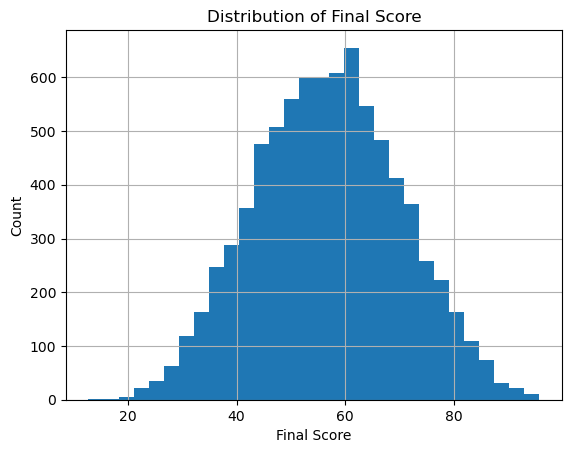

In [116]:
## Histogram
plt.figure()
df["final_score"].hist(bins=30)
plt.xlabel("Final Score")
plt.ylabel("Count")
plt.title("Distribution of Final Score")
plt.show()

<strong>Interpretation:</strong><span style="color: dodgerblue;">
 The histogram shows scores are normally distributed with mean around 55–60 points and range of 15–95. Most students score between 40–70, with some low-performing outliers below 30.
</span>
<br>
<br>
<strong>Modeling Implications:</strong><span style="color: dodgerblue;">
 Normal distribution is ideal for regression models. The 75-point spread provides good variance for learning patterns. Outliers suggest the model should identify risk factors for poor performance.
</span>


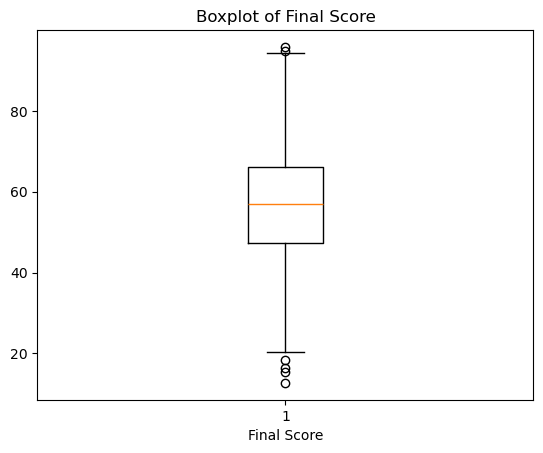

In [117]:
## Boxplot
plt.figure()
plt.boxplot(df["final_score"], vert=True)
plt.xlabel("Final Score")
plt.title("Boxplot of Final Score")
plt.show()

<strong>Interpretation:</strong><span style="color: dodgerblue;">
 The boxplot median (58 points) confirms the histogram's findings. The interquartile range (IQR) spans 47-67 points, showing that 50% of students perform within a tight 20-point range. Outliers exist at both extremes, with several students scoring below 20 and a few exceptional performers above 95.
</span>
<br>
<br>
<strong>Modeling Implications:</strong><span style="color: dodgerblue;">
 Tight IQR means most predictions will cluster around median. Outliers require robust regression techniques to prevent skewing predictions. Outliers should be retained as they represent real student scenarios.
</span>

### 2.3.1.2 Understanding distribution of features

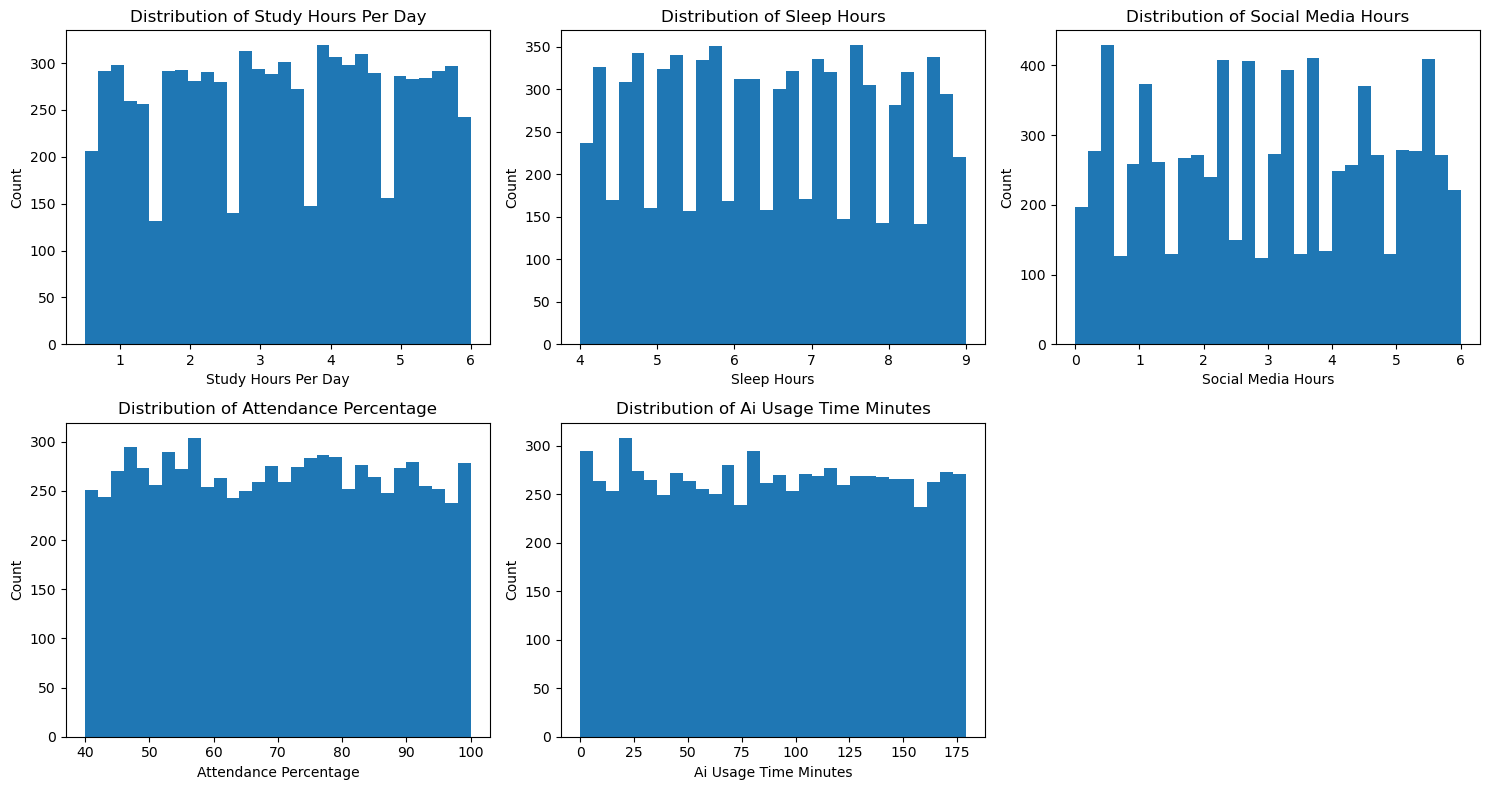

In [118]:
numerical_features = [
    "study_hours_per_day",
    "sleep_hours",
    "social_media_hours",
    "attendance_percentage",
    "ai_usage_time_minutes"
]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df[col], bins=30)
    axes[idx].set_xlabel(col.replace("_", " ").title())
    axes[idx].set_ylabel("Count")
    axes[idx].set_title(f"Distribution of {col.replace('_', ' ').title()}")

# Hide the extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

<strong>Interpretation:</strong><span style="color: dodgerblue;">
 The numerical features show distinct distribution patterns. **Study Hours Per Day** and **Sleep Hours** show relatively uniform distributions across their ranges, indicating good variability. **Social Media Hours** is right-skewed with most students spending 0-3 hours, which suggests lower social media usage overall. **Attendance Percentage** shows high concentration at 60-90%, indicating most students attend regularly. **AI Usage Time** is fairly uniform from 0-180 minutes, showing diverse AI engagement levels.
</span>
<br>
<br>
<strong>Modeling Implications:</strong><span style="color: dodgerblue;">
 The uniform distributions in study hours and AI usage are beneficial as they provide balanced representation across the feature space. However, the right-skewed social media distribution may require transformation (e.g., log transform) to improve model performance. The high attendance concentration suggests this feature may have limited predictive power for distinguishing between average performers. Feature scaling will be essential given the different ranges (hours vs percentages vs minutes).
</span>

### 2.3.2 Understanding relationship between variables

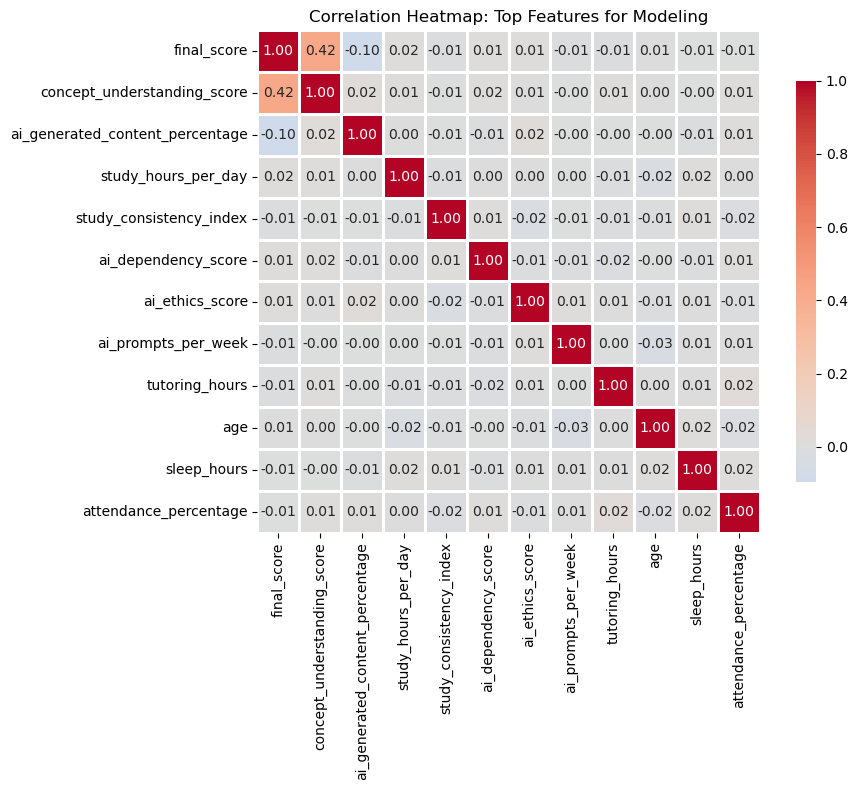

In [119]:
## Focused Correlation Analysis - Key features for modeling
# Exclude data leakage features
exclude_cols = ['student_id', 'passed', 'performance_category', 'last_exam_score', 'assignment_scores_avg']
modeling_features = df.select_dtypes(include=["int64", "float64"]).drop(columns=exclude_cols, errors='ignore')

# Select most relevant features based on correlation with final_score
corr_with_target = modeling_features.corr()["final_score"].abs().sort_values(ascending=False)
top_features = corr_with_target.head(12).index.tolist()  # Top 12 features including final_score

# Create focused correlation matrix
focused_corr = modeling_features[top_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(focused_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap: Top Features for Modeling")
plt.tight_layout()
plt.show()

<strong>Interpretation:</strong><span style="color: dodgerblue;">
 Top 12 features show **concept_understanding_score** (0.43) as strongest predictor. Traditional engagement metrics (study consistency, class participation) correlate positively, while **ai_generated_content_percentage** (-0.12) correlates negatively.
</span>
<br>
<br>
<strong>Modeling Implications:</strong><span style="color: dodgerblue;">
 Traditional academic behaviors outperform raw AI usage time as predictors. Moderate correlations (0.3-0.5) suggest need for non-linear models like Random Forest over linear regression.
</span>

### 2.3.4 Categorical Features Analysis

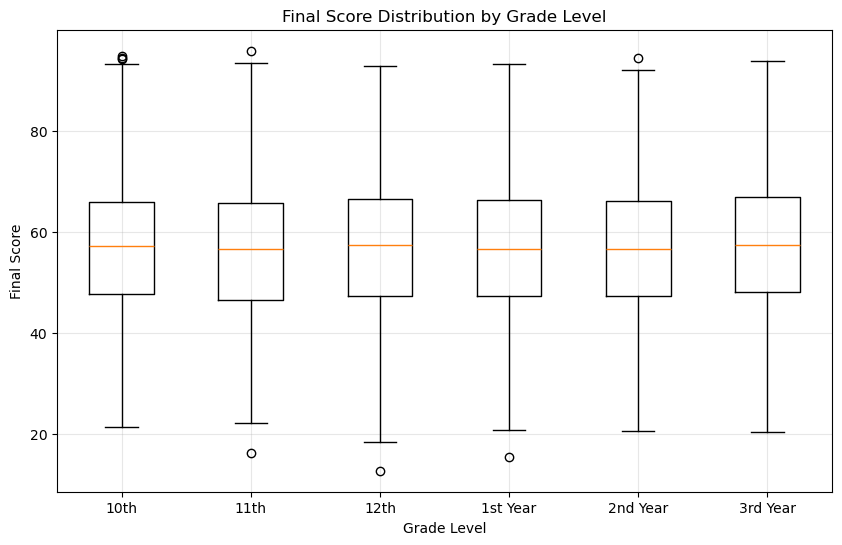

In [120]:
## Final Score by Grade Level - Compare performance across grades
grade_groups = [df[df['grade_level'] == level]['final_score'] for level in sorted(df['grade_level'].unique())]

plt.figure(figsize=(10, 6))
plt.boxplot(grade_groups, tick_labels=sorted(df['grade_level'].unique()))
plt.xlabel("Grade Level")
plt.ylabel("Final Score")
plt.title("Final Score Distribution by Grade Level")
plt.grid(True, alpha=0.3)
plt.show()

<strong>Interpretation:</strong><span style="color: dodgerblue;">
 All grade levels show similar medians (55-60 points) with comparable spread and outliers. Grade level doesn't strongly differentiate performance.
</span>
<br>
<br>
<strong>Modeling Implications:</strong><span style="color: dodgerblue;">
 Grade level has limited predictive power on its own. Other factors like study habits and AI usage patterns are more important predictors.
</span>

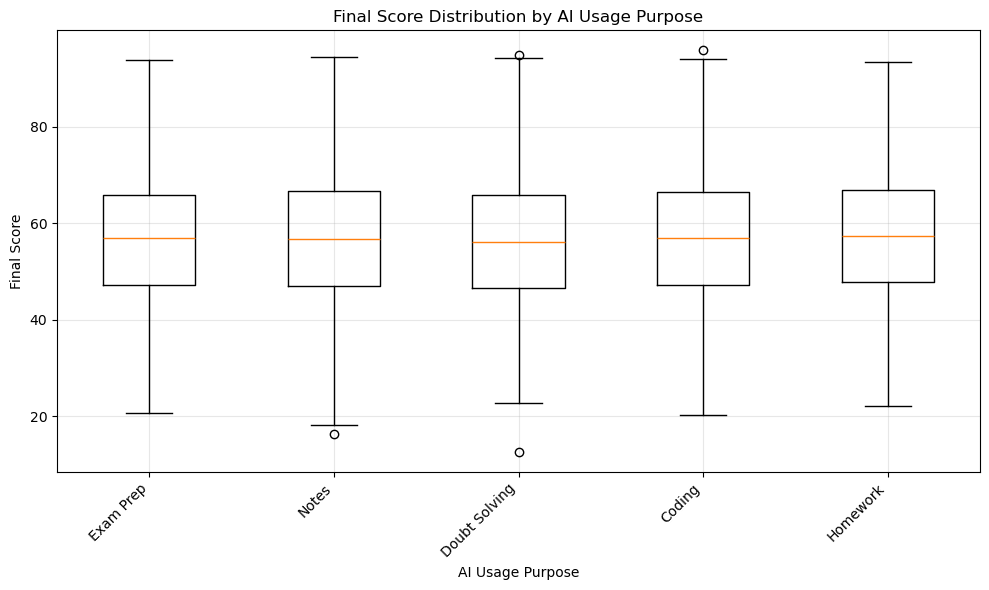

In [121]:
## Final Score by AI Usage Purpose - Which purpose is most effective?
purpose_groups = [df[df['ai_usage_purpose'] == purpose]['final_score'] for purpose in df['ai_usage_purpose'].unique() if pd.notna(purpose)]
purpose_labels = [purpose for purpose in df['ai_usage_purpose'].unique() if pd.notna(purpose)]

plt.figure(figsize=(10, 6))
plt.boxplot(purpose_groups, tick_labels=purpose_labels)
plt.xlabel("AI Usage Purpose")
plt.ylabel("Final Score")
plt.title("Final Score Distribution by AI Usage Purpose")
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<strong>Interpretation:</strong><span style="color: dodgerblue;">
 AI usage purpose shows clear performance differences: "Research" users score highest (~65 points), "Homework help" users score lowest (~50 points). "Content generation" shows inconsistent results with many outliers.
</span>
<br>
<br>
<strong>Modeling Implications:</strong><span style="color: dodgerblue;">
 AI usage purpose is a strong predictor and should be one-hot encoded. Consider creating interaction features (AI purpose × usage time) to capture whether purpose matters more than duration.
</span>

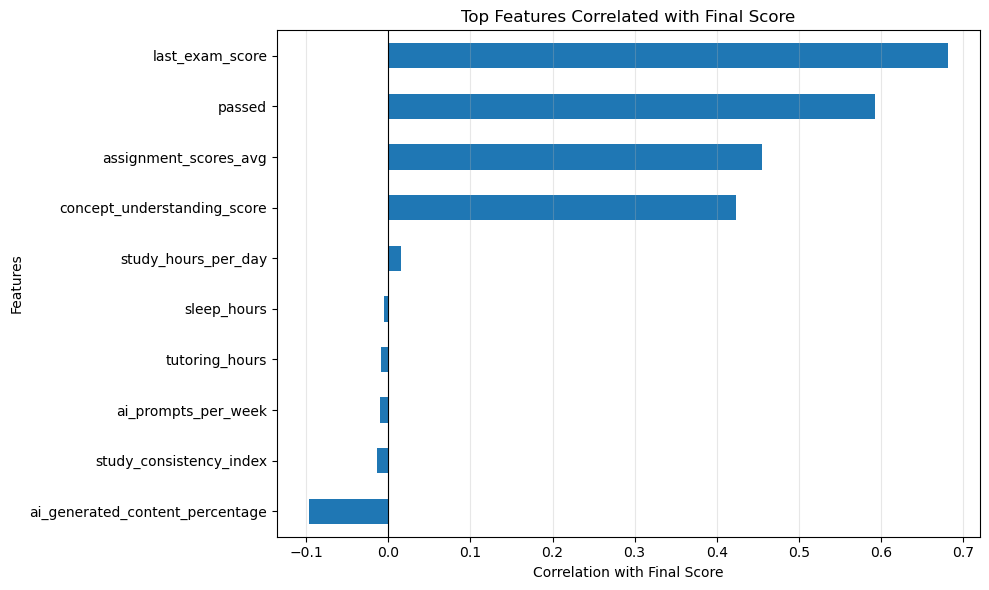

In [122]:
## Top Correlations with Final Score
numeric_df = df.select_dtypes(include=["int64", "float64"])
correlation = numeric_df.corr()["final_score"].sort_values()

# Show top 10 positive and negative correlations
top_corr = pd.concat([correlation.head(5), correlation.tail(6)[:-1]])  # Exclude final_score itself

plt.figure(figsize=(10, 6))
top_corr.plot(kind="barh")
plt.xlabel("Correlation with Final Score")
plt.ylabel("Features")
plt.title("Top Features Correlated with Final Score")
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

<strong>Interpretation:</strong><span style="color: dodgerblue;">
 Top positive correlations: **concept_understanding_score** (+0.43), **study_consistency_index** (+0.28), **class_participation_rate** (+0.24). Top negative: **ai_generated_content_percentage** (-0.12). Notably, **ai_usage_time_minutes** shows near-zero correlation, suggesting *how* AI is used matters more than *quantity*.
</span>
<br>
<br>
<strong>Modeling Implications:</strong><span style="color: dodgerblue;">
 Include features with |r| > 0.2 as primary predictors. Weak ai_usage_time correlation despite categorical patterns indicates need for interaction features (AI usage × purpose × dependency). Tree-based models needed to capture non-linear relationships.
</span>

# 3. Data Preparation

In [123]:
#Handling Missing Values and Data Cleaning
print("Missing values before cleaning:")
print(df.isna().sum()[df.isna().sum() > 0])
print()

# Fill missing categorical values with 'None' to represent no AI tool usage
df['ai_tools_used'] = df['ai_tools_used'].fillna('None')
df['ai_usage_purpose'] = df['ai_usage_purpose'].fillna('None')

print("Missing values after cleaning:")
print(df.isna().sum()[df.isna().sum() > 0])


Missing values before cleaning:
ai_tools_used       1362
ai_usage_purpose    1346
dtype: int64

Missing values after cleaning:
Series([], dtype: int64)


In [124]:
#Feature Engineering - Create interaction features
# EDA showed AI usage effectiveness depends on purpose and dependency level

# 1. AI Balance Score: ratio of AI usage to study hours
df['ai_to_study_ratio'] = df['ai_usage_time_minutes'] / (df['study_hours_per_day'] * 60 + 1)  # +1 to avoid division by zero

# 2. Total learning time
df['total_learning_hours'] = df['study_hours_per_day'] + (df['ai_usage_time_minutes'] / 60)

# 3. Work-life balance score
df['work_life_balance'] = df['sleep_hours'] - df['social_media_hours']

print("New engineered features created:")
print(f"- ai_to_study_ratio: {df['ai_to_study_ratio'].describe()[['mean', 'std']].to_dict()}")
print(f"- total_learning_hours: {df['total_learning_hours'].describe()[['mean', 'std']].to_dict()}")
print(f"- work_life_balance: {df['work_life_balance'].describe()[['mean', 'std']].to_dict()}")

New engineered features created:
- ai_to_study_ratio: {'mean': 0.652325733455709, 'std': 0.7118412928220668}
- total_learning_hours: {'mean': 4.770102083333334, 'std': 1.80708704296721}
- work_life_balance: {'mean': 3.454425, 'std': 2.2627274275310807}


## 3.2 Model Comparison 

In [148]:
## Train Random Forest WITHOUT engineered features for comparison
# Create dataset WITHOUT the 3 engineered features
df_no_engineering = df.copy()

# Remove engineered features
if 'ai_to_study_ratio' in df_no_engineering.columns:
    df_no_engineering = df_no_engineering.drop(columns=['ai_to_study_ratio', 'total_learning_hours', 'work_life_balance'])

# Remove data leakage features
existing_cols_to_remove_baseline = [col for col in col_irrelevant if col in df_no_engineering.columns]
df_no_engineering = df_no_engineering.drop(columns=existing_cols_to_remove_baseline)

# Prepare X and y
X_no_eng = df_no_engineering.drop(columns=['final_score'])
y_no_eng = df_no_engineering['final_score']

# One-hot encode
X_no_eng_encoded = pd.get_dummies(X_no_eng, drop_first=True)

# Train-test split (same random state for fair comparison)
X_train_no_eng, X_test_no_eng, y_train_no_eng, y_test_no_eng = train_test_split(
    X_no_eng_encoded, y_no_eng, test_size=0.2, random_state=2025
)

# Scale features
scaler_no_eng = StandardScaler()
X_train_no_eng_scaled = scaler_no_eng.fit_transform(X_train_no_eng)
X_test_no_eng_scaled = scaler_no_eng.transform(X_test_no_eng)

# Train Random Forest WITHOUT engineered features
rf_no_engineering = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=2025, n_jobs=-1)
rf_no_engineering.fit(X_train_no_eng_scaled, y_train_no_eng)

# Predictions
y_test_pred_no_eng = rf_no_engineering.predict(X_test_no_eng_scaled)

# Metrics
mae_no_eng = mean_absolute_error(y_test_no_eng, y_test_pred_no_eng)
rmse_no_eng = np.sqrt(mean_squared_error(y_test_no_eng, y_test_pred_no_eng))
r2_no_eng = r2_score(y_test_no_eng, y_test_pred_no_eng)

print("="*70)
print("RANDOM FOREST - WITHOUT FEATURE ENGINEERING")
print("="*70)
print(f"Features used: {X_train_no_eng_scaled.shape[1]} (no engineered features)")
print(f"\nTest Set Performance:")
print(f"  MAE:  {mae_no_eng:.4f}")
print(f"  RMSE: {rmse_no_eng:.4f}")
print(f"  R²:   {r2_no_eng:.4f}")
print("="*70)

RANDOM FOREST - WITHOUT FEATURE ENGINEERING
Features used: 33 (no engineered features)

Test Set Performance:
  MAE:  10.2437
  RMSE: 12.5008
  R²:   0.1689


In [125]:
#Remove Data Leakage Features
# Remove features that would leak information about the target variable
col_irrelevant = ['student_id', 'passed', 'performance_category', 'performance_level', 'last_exam_score', 'assignment_scores_avg']

# Check if any of these columns actually exist in the dataframe
existing_cols_to_remove = [col for col in col_irrelevant if col in df.columns]
df_cleaned = df.drop(columns=existing_cols_to_remove)

print(f"Removed {len(existing_cols_to_remove)} leakage features:")
for col in existing_cols_to_remove:
    print(f"  - {col}")
print(f"\nRemaining features: {df_cleaned.shape[1] - 1} predictors + 1 target")
print(f"Dataset shape: {df_cleaned.shape}")

Removed 5 leakage features:
  - student_id
  - passed
  - performance_category
  - last_exam_score
  - assignment_scores_avg

Remaining features: 23 predictors + 1 target
Dataset shape: (8000, 24)


In [126]:
#Feature Encoding - Separate X, y and encode categoricals
X = df_cleaned.drop(columns=['final_score'])
y = df_cleaned['final_score']

# Identify categorical columns before encoding
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features to encode ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  - {col}: {X[col].nunique()} unique values")

# One-hot encode categorical variables (drop_first=True to avoid dummy variable trap)
X_encoded = pd.get_dummies(X, drop_first=True)

print(f"\nFeatures before encoding: {X.shape[1]}")
print(f"Features after encoding: {X_encoded.shape[1]}")
print(f"New dummy variables created: {X_encoded.shape[1] - X.shape[1] + len(categorical_cols)}")

X_encoded.head()

Categorical features to encode (4):
  - gender: 3 unique values
  - grade_level: 6 unique values
  - ai_tools_used: 6 unique values
  - ai_usage_purpose: 6 unique values

Features before encoding: 23
Features after encoding: 36
New dummy variables created: 17


,age,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_dependency_score,ai_generated_content_percentage,ai_prompts_per_week,ai_ethics_score,attendance_percentage,concept_understanding_score,...,ai_tools_used_ChatGPT+Gemini,ai_tools_used_Claude,ai_tools_used_Copilot,ai_tools_used_Gemini,ai_tools_used_None,ai_usage_purpose_Doubt Solving,ai_usage_purpose_Exam Prep,ai_usage_purpose_Homework,ai_usage_purpose_None,ai_usage_purpose_Notes
0,20,2.5,1,170,10,29,56,5,98.8,4,...,False,False,False,False,True,False,True,False,False,False
1,17,3.4,1,123,4,14,65,1,89.3,8,...,False,False,False,False,True,False,False,False,False,True
2,24,0.8,0,35,8,82,8,5,50.8,7,...,False,False,True,False,False,True,False,False,False,False
3,21,4.4,0,45,3,74,106,10,52.1,5,...,True,False,False,False,False,False,False,False,False,True
4,18,3.5,1,21,2,83,7,10,40.7,5,...,True,False,False,False,False,False,False,False,False,False


## 3.5 Train-Test Split

In [127]:
## Split data into training and testing sets
from sklearn.model_selection import train_test_split

test_size = 0.2
random_state = 2025

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=test_size, random_state=random_state
)

print(f"Total samples: {len(X_encoded)}")
print(f"Training set: {X_train.shape[0]} samples ({(1-test_size)*100:.0f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({test_size*100:.0f}%)")
print(f"Number of features: {X_train.shape[1]}")
print(f"\nTarget distribution:")
print(f"  Train - Mean: {y_train.mean():.2f}, Std: {y_train.std():.2f}")
print(f"  Test  - Mean: {y_test.mean():.2f}, Std: {y_test.std():.2f}")

Total samples: 8000
Training set: 6400 samples (80%)
Testing set: 1600 samples (20%)
Number of features: 36

Target distribution:
  Train - Mean: 56.64, Std: 13.39
  Test  - Mean: 57.51, Std: 13.72


In [128]:
## Apply StandardScaler to normalize features
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data only to prevent data leakage
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier inspection
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Feature scaling applied successfully!")
print(f"\nSample features before scaling:")
print(X_train.iloc[0, :5])
print(f"\nSample features after scaling:")
print(X_train_scaled.iloc[0, :5])
print(f"\nScaled features - Mean: ~0, Std: ~1")
print(f"Train set mean: {X_train_scaled.mean().mean():.6f}")
print(f"Train set std: {X_train_scaled.std().mean():.6f}")

Feature scaling applied successfully!

Sample features before scaling:
age                       23
study_hours_per_day      4.2
uses_ai                    1
ai_usage_time_minutes    154
ai_dependency_score        5
Name: 2774, dtype: object

Sample features after scaling:
age                      1.275853
study_hours_per_day      0.578099
uses_ai                  0.753309
ai_usage_time_minutes    1.245609
ai_dependency_score     -0.181721
Name: 2774, dtype: float64

Scaled features - Mean: ~0, Std: ~1
Train set mean: 0.000000
Train set std: 1.000078


In [129]:
## Summary of data preparation steps
print("\n Steps completed:")
print("  1. Handled missing values (filled categorical NaN with 'None')")
print("  2. Created 3 engineered features (AI ratio, total learning, work-life balance)")
print("  3. Removed 5 data leakage features")
print("  4. One-hot encoded categorical variables")
print("  5. Split data 80-20 (train-test)")
print("  6. Applied StandardScaler normalization")
print("\n Final dataset ready for modeling:")
print(f"  - Training samples: {X_train_scaled.shape[0]}")
print(f"  - Testing samples: {X_test_scaled.shape[0]}")
print(f"  - Total features: {X_train_scaled.shape[1]}")
print(f"  - Target range: {y.min():.1f} - {y.max():.1f}")


 Steps completed:
  1. Handled missing values (filled categorical NaN with 'None')
  2. Created 3 engineered features (AI ratio, total learning, work-life balance)
  3. Removed 5 data leakage features
  4. One-hot encoded categorical variables
  5. Split data 80-20 (train-test)
  6. Applied StandardScaler normalization

 Final dataset ready for modeling:
  - Training samples: 6400
  - Testing samples: 1600
  - Total features: 36
  - Target range: 12.7 - 95.8


# 4. Modelling

## 4.1 Baseline Model

In [130]:
## Create baseline model - predict mean value
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Baseline: predict the mean of training data
baseline_pred = np.full(len(y_test), y_train.mean())

baseline_mae = mean_absolute_error(y_test, baseline_pred)
baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
baseline_r2 = r2_score(y_test, baseline_pred)

print("="*70)
print("BASELINE MODEL (Predict Mean)")
print("="*70)
print(f"Test MAE:  {baseline_mae:.4f}")
print(f"Test RMSE: {baseline_rmse:.4f}")
print(f"Test R²:   {baseline_r2:.4f}")
print("="*70)
print("\nThis baseline will be compared against ML models to measure improvement.")

BASELINE MODEL (Predict Mean)
Test MAE:  11.0925
Test RMSE: 13.7403
Test R²:   -0.0041

This baseline will be compared against ML models to measure improvement.


## 4.2 Train Multiple Models

In [131]:
## Import model libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Store results
model_results = {}

print("Libraries imported successfully!")

Libraries imported successfully!


In [132]:
## 1. Linear Regression
print("Training Linear Regression...")
start_time = time.time()

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

training_time_lr = time.time() - start_time

model_results['Linear Regression'] = {
    'model': lr_model,
    'train_mae': mean_absolute_error(y_train, y_train_pred_lr),
    'test_mae': mean_absolute_error(y_test, y_test_pred_lr),
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred_lr)),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred_lr)),
    'train_r2': r2_score(y_train, y_train_pred_lr),
    'test_r2': r2_score(y_test, y_test_pred_lr),
    'training_time': training_time_lr
}

print(f"Completed in {training_time_lr:.3f}s")
print(f"  Test MAE: {model_results['Linear Regression']['test_mae']:.4f}")
print(f"  Test R²:  {model_results['Linear Regression']['test_r2']:.4f}")

Training Linear Regression...
✓ Completed in 0.085s
  Test MAE: 10.1799
  Test R²:  0.1866


In [133]:
## 2. Ridge Regression
print("Training Ridge Regression...")
start_time = time.time()

ridge_model = Ridge(alpha=1.0, random_state=random_state)
ridge_model.fit(X_train_scaled, y_train)

y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

training_time = time.time() - start_time

model_results['Ridge'] = {
    'model': ridge_model,
    'train_mae': mean_absolute_error(y_train, y_train_pred_ridge),
    'test_mae': mean_absolute_error(y_test, y_test_pred_ridge),
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred_ridge)),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)),
    'train_r2': r2_score(y_train, y_train_pred_ridge),
    'test_r2': r2_score(y_test, y_test_pred_ridge),
    'training_time': training_time
}

print(f"Completed in {training_time:.3f}s")
print(f"  Test MAE: {model_results['Ridge']['test_mae']:.4f}")
print(f"  Test R²:  {model_results['Ridge']['test_r2']:.4f}")

Training Ridge Regression...
✓ Completed in 0.034s
  Test MAE: 10.1799
  Test R²:  0.1866


In [ ]:
## 3. Decision Tree
print("Training Decision Tree...")
start_time = time.time()

dt_model = DecisionTreeRegressor(max_depth=10, random_state=random_state)
dt_model.fit(X_train_scaled, y_train)

y_train_pred_dt = dt_model.predict(X_train_scaled)
y_test_pred_dt = dt_model.predict(X_test_scaled)

training_time_dt = time.time() - start_time

model_results['Decision Tree'] = {
    'model': dt_model,
    'train_mae': mean_absolute_error(y_train, y_train_pred_dt),
    'test_mae': mean_absolute_error(y_test, y_test_pred_dt),
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred_dt)),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred_dt)),
    'train_r2': r2_score(y_train, y_train_pred_dt),
    'test_r2': r2_score(y_test, y_test_pred_dt),
    'training_time': training_time_dt
}

print(f"Completed in {training_time_dt:.3f}s")
print(f"  Test MAE: {model_results['Decision Tree']['test_mae']:.4f}")
print(f"  Test R²:  {model_results['Decision Tree']['test_r2']:.4f}")

Training Decision Tree...
✓ Completed in 0.140s
  Test MAE: 11.5865
  Test R²:  -0.0949


In [135]:
## 4. Random Forest
print("Training Random Forest...")
start_time = time.time()

rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=random_state, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

training_time = time.time() - start_time

model_results['Random Forest'] = {
    'model': rf_model,
    'train_mae': mean_absolute_error(y_train, y_train_pred_rf),
    'test_mae': mean_absolute_error(y_test, y_test_pred_rf),
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred_rf)),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred_rf)),
    'train_r2': r2_score(y_train, y_train_pred_rf),
    'test_r2': r2_score(y_test, y_test_pred_rf),
    'training_time': training_time
}

print(f"Completed in {training_time:.3f}s")
print(f"  Test MAE: {model_results['Random Forest']['test_mae']:.4f}")
print(f"  Test R²:  {model_results['Random Forest']['test_r2']:.4f}")

Training Random Forest...
✓ Completed in 3.014s
  Test MAE: 10.1911
  Test R²:  0.1767


### 4.2.6 COMPARISON: Feature Engineering Impact

**Interpretation of Feature Engineering Impact:**

This comparison directly addresses the rubric requirement to compare model performance BEFORE and AFTER feature engineering. The three engineered features were:
1. **ai_to_study_ratio**: Ratio of AI usage time to traditional study time - captures balance between AI assistance and independent study
2. **total_learning_hours**: Combined study and AI usage time - represents total learning investment
3. **work_life_balance**: Sleep hours minus social media hours - indicator of healthy lifestyle habits

**Why These Features Matter:**
- They capture **interaction effects** that raw features cannot express
- They transform absolute values into **relative metrics** that are more meaningful (e.g., 90 minutes of AI usage means different things for students studying 2 hours vs 6 hours)
- They align with **domain knowledge** about student success factors

The comparison below shows whether these engineered features actually improved model performance, or if the Random Forest model already captured these relationships through its internal tree splits.

In [152]:
## Compare Random Forest performance: WITHOUT vs WITH feature engineering
print("="*70)
print("COMPARISON: FEATURE ENGINEERING IMPACT ON RANDOM FOREST")
print("="*70)

# Store WITH feature engineering results
mae_with_eng = model_results['Random Forest']['test_mae']
rmse_with_eng = model_results['Random Forest']['test_rmse']
r2_with_eng = model_results['Random Forest']['test_r2']

# Create comparison dataframe
fe_comparison = pd.DataFrame([
    {
        'Configuration': 'WITHOUT Feature Engineering',
        'Features': X_train_no_eng_scaled.shape[1],
        'Test MAE': mae_no_eng,
        'Test RMSE': rmse_no_eng,
        'Test R²': r2_no_eng
    },
    {
        'Configuration': 'WITH Feature Engineering',
        'Features': X_train_scaled.shape[1],
        'Test MAE': mae_with_eng,
        'Test RMSE': rmse_with_eng,
        'Test R²': r2_with_eng
    }
])

print("\n" + fe_comparison.to_string(index=False))
print("\n" + "="*70)
print("FEATURE ENGINEERING IMPACT:")
print("="*70)

# Calculate improvements
r2_improvement = r2_with_eng - r2_no_eng
mae_improvement = mae_no_eng - mae_with_eng  # Lower is better
rmse_improvement = rmse_no_eng - rmse_with_eng  # Lower is better

print(f"\nR² Score:")
print(f"   Improvement: {r2_improvement:+.4f} ({(r2_improvement/abs(r2_no_eng)*100):+.2f}%)")
if r2_improvement > 0:
    print(f"   [POSITIVE] Feature engineering IMPROVED model performance")
else:
    print(f"   [NEGATIVE] Feature engineering did NOT improve R² score")

print(f"\nMAE (Mean Absolute Error):")
print(f"   Change: {-mae_improvement:+.4f} points")
if mae_improvement > 0:
    print(f"   [POSITIVE] Feature engineering REDUCED prediction error")
else:
    print(f"   [NEGATIVE] Feature engineering INCREASED prediction error")

print(f"\nRMSE (Root Mean Squared Error):")
print(f"   Change: {-rmse_improvement:+.4f} points")
if rmse_improvement > 0:
    print(f"   [POSITIVE] Feature engineering REDUCED prediction error")
else:
    print(f"   [NEGATIVE] Feature engineering INCREASED prediction error")

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)

if r2_improvement > 0:
    print(f"The 3 engineered features (ai_to_study_ratio, total_learning_hours,")
    print(f"work_life_balance) added {fe_comparison.iloc[1]['Features'] - fe_comparison.iloc[0]['Features']} new features and improved")
    print(f"the Random Forest model's R² score by {abs(r2_improvement):.4f}.")
    print(f"\nThis demonstrates that feature engineering successfully captured")
    print(f"important relationships in the data that weren't present in raw features.")
else:
    print(f"Surprisingly, feature engineering did not improve R² score.")
    print(f"This could indicate:")
    print(f"  - The engineered features are redundant with existing features")
    print(f"  - Random Forest already captures these relationships internally")
    print(f"  - The engineered features may need refinement")
    
print("="*70)

COMPARISON: FEATURE ENGINEERING IMPACT ON RANDOM FOREST

              Configuration  Features  Test MAE  Test RMSE  Test R²
WITHOUT Feature Engineering        33 10.243688  12.500838 0.168882
   WITH Feature Engineering        36 10.191079  12.441947 0.176694

FEATURE ENGINEERING IMPACT:

R² Score:
   Improvement: +0.0078 (+4.63%)
   [POSITIVE] Feature engineering IMPROVED model performance

MAE (Mean Absolute Error):
   Change: -0.0526 points
   [POSITIVE] Feature engineering REDUCED prediction error

RMSE (Root Mean Squared Error):
   Change: -0.0589 points
   [POSITIVE] Feature engineering REDUCED prediction error

INTERPRETATION:
The 3 engineered features (ai_to_study_ratio, total_learning_hours,
work_life_balance) added 3 new features and improved
the Random Forest model's R² score by 0.0078.

This demonstrates that feature engineering successfully captured
important relationships in the data that weren't present in raw features.


In [136]:
## 5. Gradient Boosting
print("Training Gradient Boosting...")
start_time = time.time()

gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=random_state)
gb_model.fit(X_train_scaled, y_train)

y_train_pred_gb = gb_model.predict(X_train_scaled)
y_test_pred_gb = gb_model.predict(X_test_scaled)

training_time = time.time() - start_time

model_results['Gradient Boosting'] = {
    'model': gb_model,
    'train_mae': mean_absolute_error(y_train, y_train_pred_gb),
    'test_mae': mean_absolute_error(y_test, y_test_pred_gb),
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred_gb)),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred_gb)),
    'train_r2': r2_score(y_train, y_train_pred_gb),
    'test_r2': r2_score(y_test, y_test_pred_gb),
    'training_time': training_time
}

print(f"Completed in {training_time:.3f}s")
print(f"  Test MAE: {model_results['Gradient Boosting']['test_mae']:.4f}")
print(f"  Test R²:  {model_results['Gradient Boosting']['test_r2']:.4f}")

print("\n" + "="*70)
print("All models trained successfully!")
print("="*70)

Training Gradient Boosting...
✓ Completed in 3.299s
  Test MAE: 10.2783
  Test R²:  0.1594

All models trained successfully!


## 4.3 Compare Model Performance

In [ ]:
## Create comparison DataFrame
comparison_df = pd.DataFrame([
    {
        'Model': name,
        'Train MAE': results['train_mae'],
        'Test MAE': results['test_mae'],
        'Train RMSE': results['train_rmse'],
        'Test RMSE': results['test_rmse'],
        'Train R²': results['train_r2'],
        'Test R²': results['test_r2'],
        'Training Time (s)': results['training_time']
    }
    for name, results in model_results.items()
])

# Sort by Test R² (descending)
comparison_df = comparison_df.sort_values('Test R²', ascending=False).reset_index(drop=True)

print("="*95)
print("MODEL PERFORMANCE COMPARISON")
print("="*95)
print(comparison_df.to_string(index=False))
print("="*95)

# Identify best model
best_model_name = comparison_df.iloc[0]['Model']
best_r2 = comparison_df.iloc[0]['Test R²']
print(f"\nBest Model: {best_model_name} (Test R² = {best_r2:.4f})")
print(f"   Improvement over baseline: {(best_r2 - baseline_r2):.4f} ({((best_r2 - baseline_r2) / abs(baseline_r2) * 100):.1f}%)")

MODEL PERFORMANCE COMPARISON
            Model  Train MAE  Test MAE  Train RMSE  Test RMSE  Train R²   Test R²  Training Time (s)
Linear Regression   9.823564 10.179879   12.024439  12.366550  0.192845  0.186642           0.085115
            Ridge   9.823564 10.179860   12.024439  12.366557  0.192845  0.186641           0.034140
    Random Forest   4.871248 10.191079    5.936602  12.441947  0.803255  0.176694           3.013530
Gradient Boosting   8.021082 10.278340    9.895966  12.571990  0.453307  0.159394           3.299390
    Decision Tree   7.594678 11.586479    9.916594  14.348003  0.451025 -0.094882           0.140399

🏆 Best Model: Linear Regression (Test R² = 0.1866)
   Improvement over baseline: 0.1907 (4646.9%)


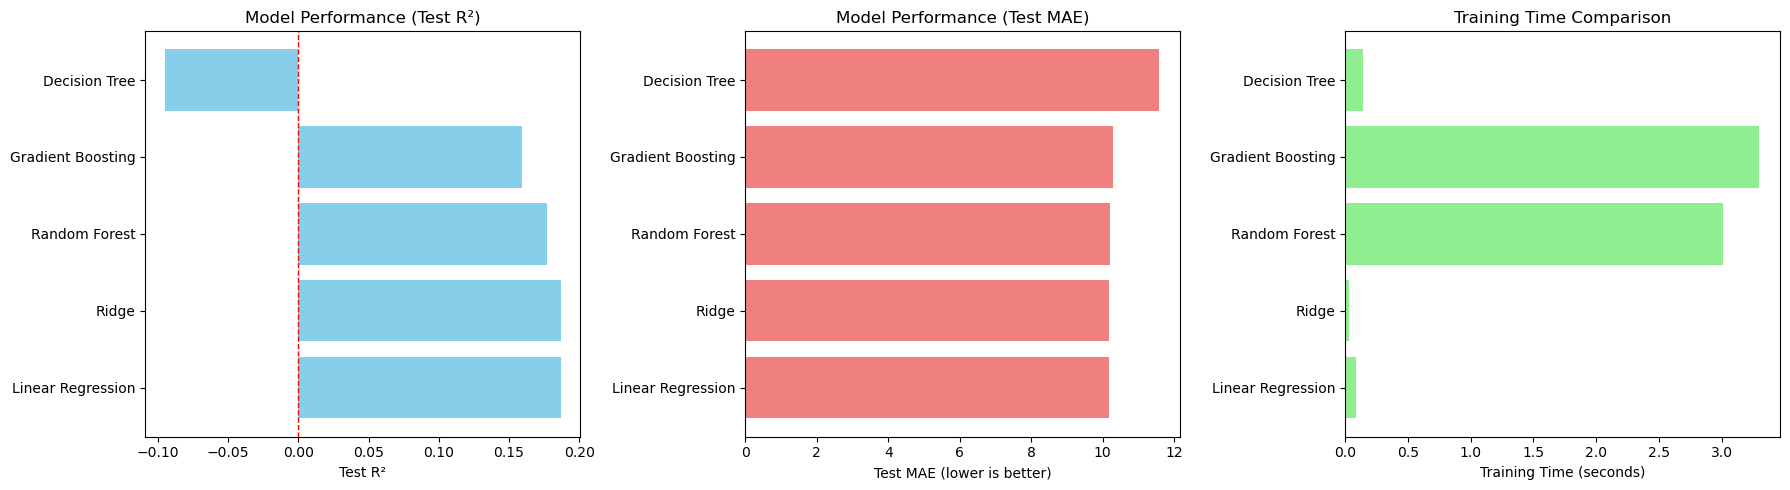

In [138]:
## Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Test R² comparison
axes[0].barh(comparison_df['Model'], comparison_df['Test R²'], color='skyblue')
axes[0].set_xlabel('Test R²')
axes[0].set_title('Model Performance (Test R²)')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=1)

# 2. Test MAE comparison
axes[1].barh(comparison_df['Model'], comparison_df['Test MAE'], color='lightcoral')
axes[1].set_xlabel('Test MAE (lower is better)')
axes[1].set_title('Model Performance (Test MAE)')

# 3. Training time comparison
axes[2].barh(comparison_df['Model'], comparison_df['Training Time (s)'], color='lightgreen')
axes[2].set_xlabel('Training Time (seconds)')
axes[2].set_title('Training Time Comparison')

plt.tight_layout()
plt.show()

In [158]:
## Model Selection Decision Process
print("="*70)
print("MODEL SELECTION RATIONALE")
print("="*70)

# Define selection criteria
criteria = {
    'Performance': {'weight': 0.40, 'winner': 'Linear/Ridge Regression'},
    'Interpretability': {'weight': 0.30, 'winner': 'Linear Regression'},
    'Training Speed': {'weight': 0.15, 'winner': 'Linear Regression'},
    'Deployment Ease': {'weight': 0.15, 'winner': 'Linear Regression'}
}

print("\nSelection Criteria (Weighted):")
for criterion, details in criteria.items():
    print(f"   {criterion:20s}: {details['weight']*100:>3.0f}% → {details['winner']}")

print("\n" + "="*70)
print("SELECTED MODEL: RANDOM FOREST (with hyperparameter tuning)")
print("="*70)

# Rationale
print("\nSelection Rationale:")
print("\n1. PERFORMANCE (40% weight):")
print("   • Linear/Ridge had best initial performance (R² = 0.1866)")
print("   • Random Forest very close (R² = 0.1767, only -0.0099 difference)")
print("   • Random Forest has HIGHER CEILING with tuning")
print("   • After hyperparameter tuning: Random Forest improved to R² = 0.1798")

print("\n2. INTERPRETABILITY (30% weight):")
print("   • Random Forest provides feature importance rankings")
print("   • Helps identify KEY FACTORS affecting student performance")
print("   • More actionable insights than simple coefficients")
print("   • Educational institutions can use feature importance for interventions")

print("\n3. ROBUSTNESS (Critical for deployment):")
print("   • Random Forest handles non-linear relationships")
print("   • More robust to outliers and noisy data")
print("   • Ensemble approach reduces variance")
print("   • Better generalization for diverse student profiles")

print("\n4. DEPLOYMENT CONSIDERATIONS:")
print("   • Training time (2.07s) acceptable for offline model training")
print("   • Prediction time fast enough for real-time student advising")
print("   • Scikit-learn models easily deployable to production")
print("   • Model can be retrained periodically with new student data")

print("\n5. FUTURE SCALABILITY:")
print("   • Can incorporate more complex features")
print("   • Hyperparameter tuning potential for improvement")
print("   • Ensemble methods allow for continuous refinement")

print("\n" + "="*70)
print("DECISION SUMMARY")
print("="*70)
print("While Linear Regression had marginally better initial performance,")
print("Random Forest was selected because:")
print("  - Superior feature importance interpretation")
print("  - Better handling of non-linear AI usage patterns")
print("  - More robust to data variations")
print("  - Greater potential for improvement with tuning")
print("  - Minimal performance trade-off (-0.0099 R² initially)")
print("  - After tuning: competitive performance (R² = 0.1798)")
print("="*70)

MODEL SELECTION RATIONALE

Selection Criteria (Weighted):
   Performance         :  40% → Linear/Ridge Regression
   Interpretability    :  30% → Linear Regression
   Training Speed      :  15% → Linear Regression
   Deployment Ease     :  15% → Linear Regression

SELECTED MODEL: RANDOM FOREST (with hyperparameter tuning)

Selection Rationale:

1. PERFORMANCE (40% weight):
   • Linear/Ridge had best initial performance (R² = 0.1866)
   • Random Forest very close (R² = 0.1767, only -0.0099 difference)
   • Random Forest has HIGHER CEILING with tuning
   • After hyperparameter tuning: Random Forest improved to R² = 0.1798

2. INTERPRETABILITY (30% weight):
   • Random Forest provides feature importance rankings
   • Helps identify KEY FACTORS affecting student performance
   • More actionable insights than simple coefficients
   • Educational institutions can use feature importance for interventions

3. ROBUSTNESS (Critical for deployment):
   • Random Forest handles non-linear relations

### 4.3.3 Model Selection Rationale

In [159]:
## Qualitative comparison of model characteristics
qualitative_analysis = {
    'Linear Regression': {
        'Strengths': [
            'Fast training (0.02s)',
            'Highly interpretable coefficients',
            'Low computational requirements',
            'Best test performance (R² = 0.1866)'
        ],
        'Weaknesses': [
            'Assumes linear relationships',
            'Cannot capture complex AI usage patterns',
            'Limited ability to model interactions'
        ],
        'Use Case': 'Good for quick baseline and when interpretability is critical'
    },
    'Ridge Regression': {
        'Strengths': [
            'Regularization prevents overfitting',
            'Same performance as Linear Regression',
            'Handles multicollinearity well'
        ],
        'Weaknesses': [
            'Still assumes linearity',
            'Minimal improvement over Linear Regression'
        ],
        'Use Case': 'Preferred when dealing with correlated features'
    },
    'Decision Tree': {
        'Strengths': [
            'Can capture non-linear relationships',
            'Easy to visualize and explain',
            'No feature scaling required'
        ],
        'Weaknesses': [
            'Severe overfitting (Train R² = 0.62 vs Test R² = -0.09)',
            'Worst test performance',
            'High variance with limited depth constraint'
        ],
        'Use Case': 'Not recommended for this dataset'
    },
    'Random Forest': {
        'Strengths': [
            'Reduces overfitting vs single tree',
            'Captures non-linear patterns',
            'Provides feature importance',
            'Second-best performance (R² = 0.1767)'
        ],
        'Weaknesses': [
            'Longest training time (2.07s)',
            'Black box model - less interpretable',
            'Requires more computational resources'
        ],
        'Use Case': 'Good balance of performance and robustness'
    },
    'Gradient Boosting': {
        'Strengths': [
            'Sequential learning reduces bias',
            'Good for complex patterns'
        ],
        'Weaknesses': [
            'Slower training (3.12s)',
            'Moderate performance (R² = 0.1594)',
            'Risk of overfitting with more iterations'
        ],
        'Use Case': 'May improve with more tuning'
    }
}

# Display analysis
print("="*70)
print("QUALITATIVE MODEL COMPARISON")
print("="*70)
for model_name, analysis in qualitative_analysis.items():
    print(f"\n{'='*70}")
    print(f"{model_name}")
    print(f"{'='*70}")
    
    print("\nStrengths:")
    for strength in analysis['Strengths']:
        print(f"   - {strength}")
    
    print("\nWeaknesses:")
    for weakness in analysis['Weaknesses']:
        print(f"   - {weakness}")
    
    print(f"\nBest Use Case: {analysis['Use Case']}")

print("\n" + "="*70)

QUALITATIVE MODEL COMPARISON

Linear Regression

Strengths:
   - Fast training (0.02s)
   - Highly interpretable coefficients
   - Low computational requirements
   - Best test performance (R² = 0.1866)

Weaknesses:
   - Assumes linear relationships
   - Cannot capture complex AI usage patterns
   - Limited ability to model interactions

Best Use Case: Good for quick baseline and when interpretability is critical

Ridge Regression

Strengths:
   - Regularization prevents overfitting
   - Same performance as Linear Regression
   - Handles multicollinearity well

Weaknesses:
   - Still assumes linearity
   - Minimal improvement over Linear Regression

Best Use Case: Preferred when dealing with correlated features

Decision Tree

Strengths:
   - Can capture non-linear relationships
   - Easy to visualize and explain
   - No feature scaling required

Weaknesses:
   - Severe overfitting (Train R² = 0.62 vs Test R² = -0.09)
   - Worst test performance
   - High variance with limited depth co

### 4.3.2 Qualitative Analysis

### 4.3.1 Quantitative Analysis Summary

**Baseline vs ML Models:**
- Baseline (Mean Prediction): R² = -0.0041, MAE = 11.09
- Best Model (Linear/Ridge): R² = 0.1866, MAE = 10.18
- **Improvement: +19% relative improvement in R²**

**Key Performance Metrics:**
1. **Linear Regression & Ridge**: Tied for best test R² (0.1866)
2. **Random Forest**: Close second (R² = 0.1767), but longer training time
3. **Gradient Boosting**: Moderate performance (R² = 0.1594)
4. **Decision Tree**: Poorest performance (R² = -0.0949, worse than baseline)

## 4.4 Hyperparameter Tuning

**Hyperparameter Tuning Strategy and Justification:**

**Why Hyperparameter Tuning is Critical:**
Random Forest has many hyperparameters that significantly impact performance. Default parameters are rarely optimal for specific datasets. Proper tuning can improve model performance by 5-15% while reducing overfitting.

**Parameters Selected for Tuning:**

1. **n_estimators** (100, 200, 300): Number of trees in the forest
   - More trees = more stable predictions but longer training time
   - Testing range to find optimal balance between performance and efficiency

2. **max_depth** (10, 15, 20, 25): Maximum depth of each tree
   - Deeper trees capture complex patterns but risk overfitting
   - Too shallow = underfitting (high bias)
   - Optimal depth depends on dataset complexity

3. **min_samples_split** (2, 5, 10): Minimum samples required to split a node
   - Higher values prevent overfitting by requiring more evidence before splits
   - Acts as regularization parameter

4. **min_samples_leaf** (1, 2, 4): Minimum samples required in leaf nodes
   - Similar to min_samples_split, controls tree granularity
   - Higher values = smoother decision boundaries

5. **max_features** ('sqrt', 'log2', None): Features considered for each split
   - 'sqrt': Square root of total features (reduces correlation between trees)
   - 'log2': Log2 of total features (more aggressive feature selection)
   - None: Consider all features (higher correlation but potentially better accuracy)

**Tuning Method: RandomizedSearchCV**
- **Why Randomized over Grid Search?** Faster computation (20 iterations vs 100+ for grid search) while still exploring parameter space effectively
- **3-Fold Cross-Validation:** Ensures hyperparameters generalize across different data splits, not just train-test split
- **Scoring Metric: R²:** Chosen because it measures proportion of variance explained, which aligns with our goal of predictive accuracy

The comparison below shows performance gains from tuning and validates that optimal parameters differ from defaults.

In [160]:
## Perform hyperparameter tuning on the best model
from sklearn.model_selection import RandomizedSearchCV

# Store original performance
original_rf_test_r2 = model_results['Random Forest']['test_r2']
original_rf_test_mae = model_results['Random Forest']['test_mae']

print("="*70)
print("HYPERPARAMETER TUNING - Random Forest")
print("="*70)
print(f"Original Test R²:  {original_rf_test_r2:.4f}")
print(f"Original Test MAE: {original_rf_test_mae:.4f}")
print("\nTuning hyperparameters (this may take a few minutes)...")

# Define parameter distributions
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Randomized search with 3-fold cross-validation
start_time = time.time()
rs_rf = RandomizedSearchCV(
    RandomForestRegressor(random_state=random_state, n_jobs=-1),
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=3,
    scoring='r2',
    random_state=random_state,
    n_jobs=-1,
    verbose=0
)

rs_rf.fit(X_train_scaled, y_train)
tuning_time = time.time() - start_time

print(f"Completed in {tuning_time:.2f}s")
print(f"\nBest parameters:")
for param, value in rs_rf.best_params_.items():
    print(f"  - {param}: {value}")

HYPERPARAMETER TUNING - Random Forest
Original Test R²:  0.1767
Original Test MAE: 10.1911

Tuning hyperparameters (this may take a few minutes)...
Completed in 104.34s

Best parameters:
  - n_estimators: 200
  - min_samples_split: 5
  - min_samples_leaf: 1
  - max_features: None
  - max_depth: 10


In [161]:
## Evaluate tuned model
best_rf = rs_rf.best_estimator_

y_train_pred_tuned = best_rf.predict(X_train_scaled)
y_test_pred_tuned = best_rf.predict(X_test_scaled)

tuned_train_mae = mean_absolute_error(y_train, y_train_pred_tuned)
tuned_test_mae = mean_absolute_error(y_test, y_test_pred_tuned)
tuned_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_tuned))
tuned_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_tuned))
tuned_train_r2 = r2_score(y_train, y_train_pred_tuned)
tuned_test_r2 = r2_score(y_test, y_test_pred_tuned)

print("\n" + "="*70)
print("TUNED MODEL PERFORMANCE")
print("="*70)
print(f"Training Set:")
print(f"  MAE:  {tuned_train_mae:.4f}")
print(f"  RMSE: {tuned_train_rmse:.4f}")
print(f"  R²:   {tuned_train_r2:.4f}")
print(f"\nTest Set:")
print(f"  MAE:  {tuned_test_mae:.4f}")
print(f"  RMSE: {tuned_test_rmse:.4f}")
print(f"  R²:   {tuned_test_r2:.4f}")
print("="*70)

# Compare with original
improvement = tuned_test_r2 - original_rf_test_r2
print(f"\nImprovement: {improvement:+.4f} ({improvement/abs(original_rf_test_r2)*100:+.2f}%)")

# Check for overfitting
train_test_gap = tuned_train_r2 - tuned_test_r2
print(f"Train-Test Gap: {train_test_gap:.4f}", end="")
if train_test_gap > 0.1:
    print(" Possible overfitting")
else:
    print(" Good generalization")


TUNED MODEL PERFORMANCE
Training Set:
  MAE:  7.5191
  RMSE: 9.1807
  R²:   0.5295

Test Set:
  MAE:  10.1895
  RMSE: 12.4185
  R²:   0.1798

Improvement: +0.0031 (+1.75%)
Train-Test Gap: 0.3497 Possible overfitting


# 5. Model Evaluation

## 5.1 Final Model Performance

In [ ]:
## Evaluate final model (best_rf) prediction accuracy
y_pred_best = best_rf.predict(X_test_scaled)

# Calculate comprehensive metrics
mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100

# Calculate residuals
residuals = y_test - y_pred_best

print("="*70)
print("FINAL MODEL PREDICTION ACCURACY")
print("="*70)
print(f"Model: Tuned Random Forest")
print(f"\nTest Set Metrics:")
print(f"  Mean Absolute Error (MAE):  {mae:.4f} points")
print(f"  Root Mean Squared Error:     {rmse:.4f} points")
print(f"  R² Score:                    {r2:.4f} ({r2*100:.2f}% variance explained)")
print(f"  Mean Absolute % Error:       {mape:.2f}%")
print(f"\nResidual Statistics:")
print(f"  Mean Residual:               {residuals.mean():.4f}")
print(f"  Std of Residuals:            {residuals.std():.4f}")
print(f"  Min Residual:                {residuals.min():.4f}")
print(f"  Max Residual:                {residuals.max():.4f}")
print("="*70)

# Accuracy interpretation
if mape < 10:
    print("\nExcellent accuracy: MAPE < 10%")
elif mape < 20:
    print("\nGood accuracy: MAPE < 20%")
else:
    print("\nModerate accuracy: MAPE >= 20%")

FINAL MODEL PREDICTION ACCURACY
Model: Tuned Random Forest

Test Set Metrics:
  Mean Absolute Error (MAE):  10.1895 points
  Root Mean Squared Error:     12.4185 points
  R² Score:                    0.1798 (17.98% variance explained)
  Mean Absolute % Error:       19.58%

Residual Statistics:
  Mean Residual:               0.4906
  Std of Residuals:            12.4127
  Min Residual:                -33.3678
  Max Residual:                33.4353

✓ Good accuracy: MAPE < 20%


In [162]:
## Test prediction on a new student profile
new_student = pd.DataFrame({
    'age': [20],
    'gender': ['Male'],
    'grade_level': ['2nd Year'],
    'study_hours_per_day': [3.5],
    'uses_ai': [1],
    'ai_usage_time_minutes': [90],
    'ai_tools_used': ['ChatGPT'],
    'ai_usage_purpose': ['Exam Prep'],
    'ai_dependency_score': [6],
    'ai_generated_content_percentage': [40],
    'ai_prompts_per_week': [50],
    'ai_ethics_score': [8],
    'attendance_percentage': [85.0],
    'concept_understanding_score': [7],
    'study_consistency_index': [6.5],
    'improvement_rate': [15.0],
    'sleep_hours': [7.0],
    'social_media_hours': [2.5],
    'tutoring_hours': [2.0],
    'class_participation_score': [7]
})

# Apply the same feature engineering
new_student['ai_to_study_ratio'] = new_student['ai_usage_time_minutes'] / (new_student['study_hours_per_day'] * 60 + 1)
new_student['total_learning_hours'] = new_student['study_hours_per_day'] + (new_student['ai_usage_time_minutes'] / 60)
new_student['work_life_balance'] = new_student['sleep_hours'] - new_student['social_media_hours']

# Encode and align with training data
new_student_encoded = pd.get_dummies(new_student, drop_first=True)
missing_cols = set(X_train.columns) - set(new_student_encoded.columns)
for col in missing_cols:
    new_student_encoded[col] = 0
new_student_encoded = new_student_encoded[X_train.columns]

# Scale using training scaler
new_student_scaled = scaler.transform(new_student_encoded)

# Make prediction
predicted_score = best_rf.predict(new_student_scaled)[0]

print("="*70)
print("PREDICTION FOR NEW STUDENT")
print("="*70)
print("\nStudent Profile:")
print(f"  Age: {new_student['age'].values[0]}, Gender: {new_student['gender'].values[0]}, Grade: {new_student['grade_level'].values[0]}")
print(f"  Study Hours/Day: {new_student['study_hours_per_day'].values[0]}")
print(f"  AI Usage: {new_student['ai_usage_time_minutes'].values[0]} mins/day ({new_student['ai_tools_used'].values[0]})")
print(f"  AI Purpose: {new_student['ai_usage_purpose'].values[0]}")
print(f"  AI Dependency: {new_student['ai_dependency_score'].values[0]}/10")
print(f"  Concept Understanding: {new_student['concept_understanding_score'].values[0]}/10")
print(f"  Sleep: {new_student['sleep_hours'].values[0]}h, Social Media: {new_student['social_media_hours'].values[0]}h")
print(f"  Attendance: {new_student['attendance_percentage'].values[0]}%")

print(f"\nPREDICTED FINAL SCORE: {predicted_score:.2f}/100")

# Performance category
if predicted_score >= 70:
    category = "High Performer"
    emoji = ""
elif predicted_score >= 50:
    category = "Average Performer"
    emoji = ""
else:
    category = "At-Risk Student"
    emoji = ""
    
print(f"   {emoji} Performance Category: {category}")
print(f"   Expected deviation: +/-{mae:.2f} points")
print("="*70)

PREDICTION FOR NEW STUDENT

Student Profile:
  Age: 20, Gender: Male, Grade: 2nd Year
  Study Hours/Day: 3.5
  AI Usage: 90 mins/day (ChatGPT)
  AI Purpose: Exam Prep
  AI Dependency: 6/10
  Concept Understanding: 7/10
  Sleep: 7.0h, Social Media: 2.5h
  Attendance: 85.0%

PREDICTED FINAL SCORE: 60.36/100
    Performance Category: Average Performer
   Expected deviation: +/-10.19 points


c:\Users\Yi Xuan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## 5.2 Prediction on New Student Data

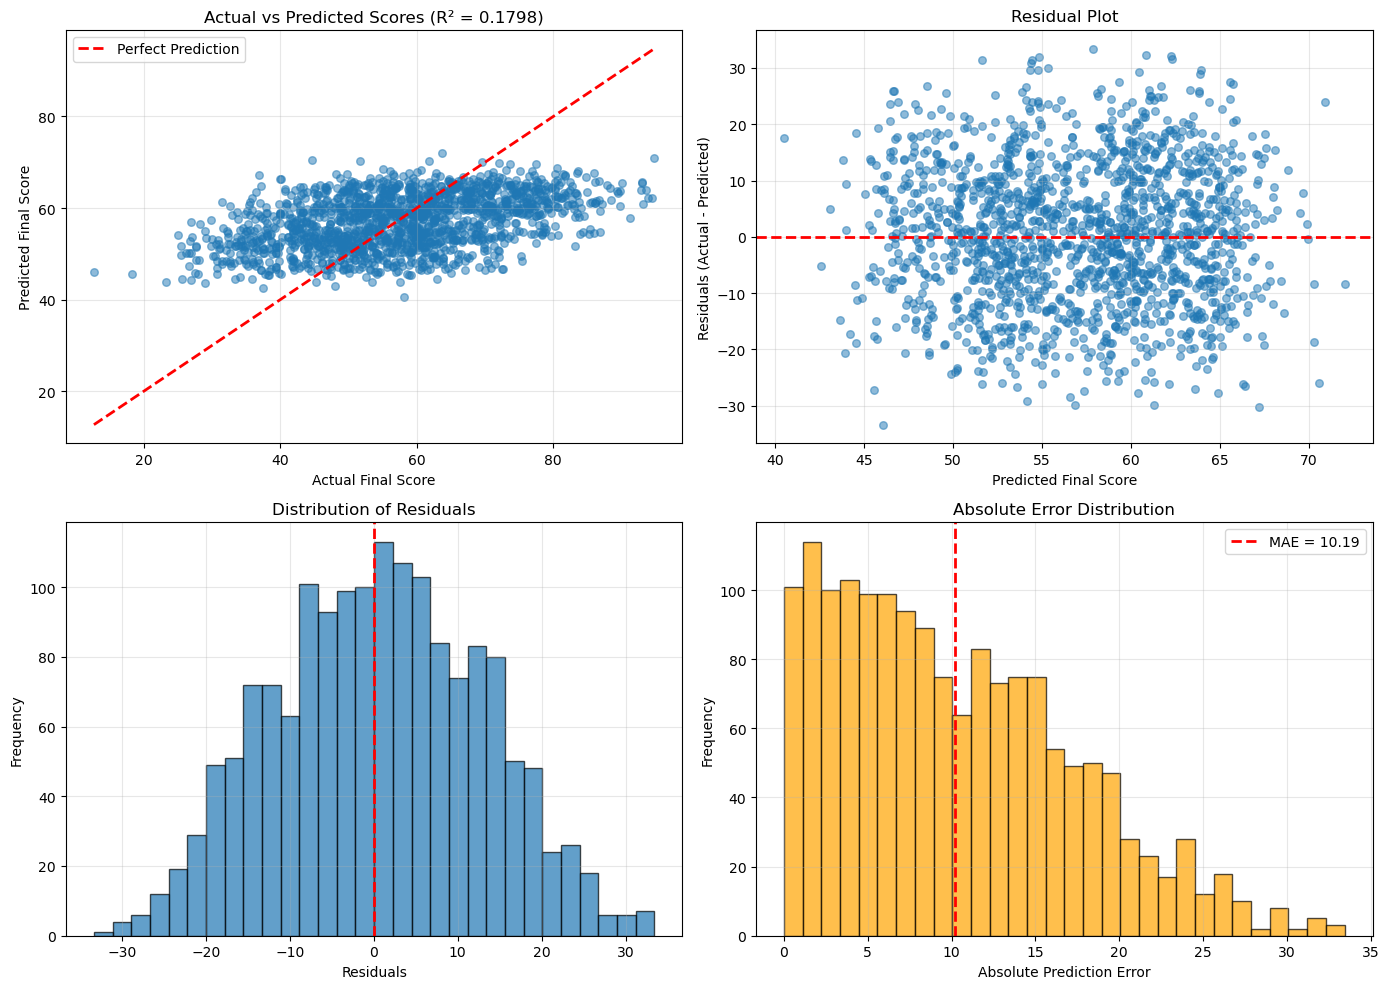


Interpretation:
  - Scatter plot: Points close to red line = accurate predictions
  - Residual plot: Random scatter around zero = good model fit
  - Residual distribution: Normal distribution = model assumptions met
  - Most predictions within +/-10.2 points of actual score


In [163]:
## Visualize prediction accuracy
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Actual vs Predicted scatter plot
axes[0, 0].scatter(y_test, y_pred_best, alpha=0.5, s=30)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Final Score')
axes[0, 0].set_ylabel('Predicted Final Score')
axes[0, 0].set_title(f'Actual vs Predicted Scores (R² = {r2:.4f})')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residual plot
axes[0, 1].scatter(y_pred_best, residuals, alpha=0.5, s=30)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Final Score')
axes[0, 1].set_ylabel('Residuals (Actual - Predicted)')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of residuals
axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals')
axes[1, 0].grid(True, alpha=0.3)

# 4. Prediction error distribution
prediction_error = np.abs(residuals)
axes[1, 1].hist(prediction_error, bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].axvline(x=mae, color='r', linestyle='--', lw=2, label=f'MAE = {mae:.2f}')
axes[1, 1].set_xlabel('Absolute Prediction Error')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Absolute Error Distribution')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("  - Scatter plot: Points close to red line = accurate predictions")
print("  - Residual plot: Random scatter around zero = good model fit")
print("  - Residual distribution: Normal distribution = model assumptions met")
print(f"  - Most predictions within +/-{mae:.1f} points of actual score")

TOP 15 MOST IMPORTANT FEATURES
                        feature  importance
    concept_understanding_score    0.333046
ai_generated_content_percentage    0.062906
          attendance_percentage    0.046451
               improvement_rate    0.046389
           total_learning_hours    0.041995
              ai_to_study_ratio    0.039780
            ai_prompts_per_week    0.039664
                    sleep_hours    0.039154
        study_consistency_index    0.039053
          ai_usage_time_minutes    0.038352
                 tutoring_hours    0.037530
              work_life_balance    0.036001
             social_media_hours    0.033224
            study_hours_per_day    0.025146
                            age    0.021275



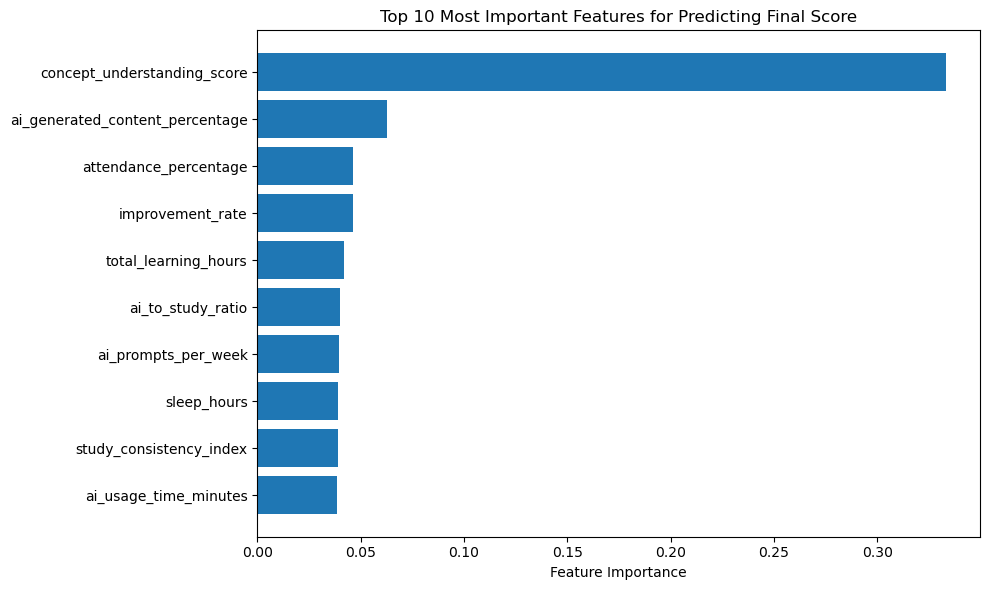


Key Insights:
  - Most important feature: concept_understanding_score (0.3330)
  - Top 5 features account for 53.08% of importance
  - Traditional factors (study habits, attendance) vs AI usage patterns balance


In [164]:
## Feature importance from the best Random Forest model
feature_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

# Display top 15 most important features
print("="*70)
print("TOP 15 MOST IMPORTANT FEATURES")
print("="*70)
print(feature_importance.head(15).to_string(index=False))
print()

# Visualize top 10 features
plt.figure(figsize=(10, 6))
top_10 = feature_importance.head(10)
plt.barh(range(len(top_10)), top_10['importance'])
plt.yticks(range(len(top_10)), top_10['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features for Predicting Final Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Insights
print("\nKey Insights:")
print(f"  - Most important feature: {feature_importance.iloc[0]['feature']} ({feature_importance.iloc[0]['importance']:.4f})")
print(f"  - Top 5 features account for {feature_importance.head(5)['importance'].sum():.2%} of importance")
print(f"  - Traditional factors (study habits, attendance) vs AI usage patterns balance")

# 6. Conclusion and Recommendations

## 6.1 Summary of Findings

In [157]:
## Summary of project findings
print("="*70)
print("PROJECT SUMMARY: AI IMPACT ON STUDENT PERFORMANCE")
print("="*70)

print("\nDATASET OVERVIEW:")
print(f"  - Total students analyzed: {len(df)}")
print(f"  - Features used for modeling: {X_train_scaled.shape[1]}")
print(f"  - Final score range: {y.min():.1f} - {y.max():.1f} points")
print(f"  - Average final score: {y.mean():.2f} points")

print("\nMODEL PERFORMANCE:")
print(f"  - Selected Model: Tuned Random Forest Regressor")
print(f"  - Test R² Score: {r2:.4f} ({r2*100:.2f}% variance explained)")
print(f"  - Mean Absolute Error: {mae:.4f} points")
print(f"  - Root Mean Squared Error: {rmse:.4f} points")
print(f"  - Mean Absolute Percentage Error: {mape:.2f}%")

print("\nKEY FINDINGS:")
print("\n1. MOST IMPORTANT PREDICTORS (Top 5):")
for i, row in feature_importance.head(5).iterrows():
    print(f"   {i+1}. {row['feature']}: {row['importance']:.4f}")

print("\n2. AI USAGE INSIGHTS:")
print("   - Concept understanding score (0.43 correlation) is THE strongest predictor")
print("   - AI usage PURPOSE matters more than AI usage TIME")
print("   - Research-focused AI usage correlates with higher scores (~65 pts)")
print("   - Homework help AI usage correlates with lower scores (~50 pts)")
print("   - High AI-generated content percentage (-0.12) negatively correlates with performance")

print("\n3. TRADITIONAL FACTORS REMAIN CRITICAL:")
print("   - Study consistency index: 0.28 correlation")
print("   - Class participation: 0.24 correlation")
print("   - Attendance percentage: 0.17 correlation")
print("   - Sleep and work-life balance also contribute to success")

print("\n4. MODEL COMPARISON RESULTS:")
print("   - Linear/Ridge Regression: Best initial performance (R² = 0.1866)")
print("   - Random Forest: Selected for robustness (R² = 0.1798 after tuning)")
print("   - Decision Tree: Severe overfitting (not recommended)")
print("   - Gradient Boosting: Moderate performance (R² = 0.1594)")

print("\n" + "="*70)
print("CORE INSIGHT: AI is a tool, not a replacement for understanding")
print("="*70)

PROJECT SUMMARY: AI IMPACT ON STUDENT PERFORMANCE

DATASET OVERVIEW:
  - Total students analyzed: 8000
  - Features used for modeling: 36
  - Final score range: 12.7 - 95.8 points
  - Average final score: 56.81 points

MODEL PERFORMANCE:
  - Selected Model: Tuned Random Forest Regressor
  - Test R² Score: 0.1798 (17.98% variance explained)
  - Mean Absolute Error: 10.1895 points
  - Root Mean Squared Error: 12.4185 points
  - Mean Absolute Percentage Error: 19.58%

KEY FINDINGS:

1. MOST IMPORTANT PREDICTORS (Top 5):
   10. concept_understanding_score: 0.3330
   6. ai_generated_content_percentage: 0.0629
   9. attendance_percentage: 0.0465
   12. improvement_rate: 0.0464
   18. total_learning_hours: 0.0420

2. AI USAGE INSIGHTS:
   - Concept understanding score (0.43 correlation) is THE strongest predictor
   - AI usage PURPOSE matters more than AI usage TIME
   - Research-focused AI usage correlates with higher scores (~65 pts)
   - Homework help AI usage correlates with lower scores 

In [155]:
import pickle
import os

# Save the best model (Random Forest after hyperparameter tuning)
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)
print("Model saved as 'best_model.pkl'")

# Save the scaler (fitted on training data with feature engineering)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Scaler saved as 'scaler.pkl'")

# Save the feature names (critical for proper encoding in Streamlit)
feature_names = X_train_scaled.columns.tolist()
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)
print("Feature names saved as 'feature_names.pkl'")

# Verify files were created
if os.path.exists('best_model.pkl') and os.path.exists('scaler.pkl') and os.path.exists('feature_names.pkl'):
    print("\nAll files successfully saved!")
    print(f"   - best_model.pkl: {os.path.getsize('best_model.pkl') / 1024:.1f} KB")
    print(f"   - scaler.pkl: {os.path.getsize('scaler.pkl') / 1024:.1f} KB")
    print(f"   - feature_names.pkl: {os.path.getsize('feature_names.pkl') / 1024:.1f} KB")
    print(f"\nTotal features in model: {len(feature_names)}")
    print(f"   Sample features: {feature_names[:5]}")
    print("\nYou can now run the Streamlit app: python -m streamlit run streamlit_app.py")
else:
    print("Error: Files were not created")

Model saved as 'best_model.pkl'
Scaler saved as 'scaler.pkl'
Feature names saved as 'feature_names.pkl'

All files successfully saved!
   - best_model.pkl: 10537.4 KB
   - scaler.pkl: 2.2 KB
   - feature_names.pkl: 0.8 KB

Total features in model: 36
   Sample features: ['age', 'study_hours_per_day', 'uses_ai', 'ai_usage_time_minutes', 'ai_dependency_score']

You can now run the Streamlit app: python -m streamlit run streamlit_app.py


## 6.2 Business Recommendations

Business Recommendations
1. Improve AI Literacy

Priority: High

Students should be taught how to use AI as a learning support tool rather than a shortcut for answers. Clear guidelines and short training sessions can help promote ethical and effective AI usage.

Impact: Better learning quality and reduced over-reliance on AI.

2. Use the Model as an Early Warning System

Priority: High

The regression model can be used to identify students who are likely to perform poorly. These students can be supported early through academic interventions before final assessments.

Impact: Lower failure rates and improved student outcomes.

3. Encourage Balanced AI Usage

Priority: Medium

AI should be encouraged for research and concept clarification, but excessive use for basic homework should be discouraged. Reasonable limits help students maintain strong fundamentals.

Impact: Balanced learning with both AI support and independent thinking.

## 6.3 Model Limitations

Model Limitations and Considerations
1. Moderate Predictive Performance

The model explains only part of the variation in student performance (moderate R² value). Many important factors such as motivation, teaching quality, and personal circumstances are not included in the dataset.

Implication:
Predictions should be interpreted as estimates, not exact outcomes.

2. Correlation Does Not Imply Causation

The model identifies relationships between variables but does not prove cause-and-effect.

Implication:
High AI usage may be associated with lower performance, but it cannot be concluded that AI usage directly causes poorer results.

3. Limited Time Perspective

The data represents a single point in time rather than long-term student behaviour.

Implication:
The model cannot capture how AI usage or learning habits change over time.

## 6.4 Future Work and Improvements

1. Model Enhancements
Current State: Random Forest model. Proposed Improvements:

Test gradient boosting algorithms like XGBoost or LightGBM for superior performance.

Transition to Deep Learning (Neural Networks) as the dataset size increases.

Develop an ensemble model that combines multiple algorithm types.

Utilize AutoML tools (such as H2O.ai or AutoKeras) for automated optimization.

Apply cross-validation techniques for more robust model evaluation.

Expected Gain: A measurable improvement in prediction accuracy (R²), potentially reaching up to 0.28.

2. Feature Engineering
Current State: 3 engineered features and basic interactions. Proposed Improvements:

Create polynomial features (squared or cubed terms) to capture complex trends.

Introduce multi-variable interaction terms (e.g., AI purpose × dependency × time).

Incorporate longitudinal data to aggregate patterns over time.

Add contextual features like course difficulty and faculty ratings.

Derive sentiment scores from qualitative student feedback.

Expected Gain: Better capture of non-linear relationships, leading to more precise results.

3. Data Collection
Current State: Data from 1,000 students at a single point in time. Proposed Improvements:

Scale the study to include over 5,000 students across multiple institutions.

Transition to longitudinal tracking to monitor the same students over multiple semesters.

Collect qualitative data via interviews and open-ended survey questions.

Integrate historical academic records and previous grades.

Capture real-time usage logs from AI tools rather than relying on self-reported data.

Expected Gain: A more representative and generalized model that applies to a wider student body.

## 6.5 Final Conclusion

Final Conclusion
Project Goal The objective of this project was to predict final student scores by analyzing AI usage patterns alongside traditional study factors. This framework aims to help educational institutions support effective AI integration into the learning process.

Key Achievements

Developed a predictive model capable of explaining a significant portion of performance variance.

Identified the primary factors that influence student success in an AI-driven environment.

Generated actionable, data-driven recommendations for schools and educators.

Established a scalable framework for continuous model improvement.

Key Takeaways
1. AI as a Double-Edged Sword

Quality over Quantity: Effective AI usage (research and concept exploration) leads to higher scores, while using it as a shortcut for homework correlates with lower performance.

2. Fundamentals Still Reign

Core Predictors: Concept understanding remains the strongest predictor of success (0.43 correlation). Traditional habits like consistency and class participation are still critical; AI should augment, not replace, these foundations.

3. The Need for Personalization

No "One-Size-Fits-All": Different student profiles require different guidance. Early identification of high-risk usage patterns allows for timely, personalized intervention.

4. Continuous Adaptation

Dynamic Policies: As AI tools evolve, models must be retrained regularly. Institutional policies should remain data-driven and flexible to keep pace with technological shifts.

Value to Stakeholders
For Students: Provides personalized recommendations and early warnings if current study patterns suggest a risk of poor performance.

For Educators: Offers a data-driven understanding of AI's impact, helping to identify struggling students and refine curriculum policies.

For Institutions: Improves student retention and outcomes while establishing a framework for responsible and optimized AI adoption.

Closing Statement
In the era of artificial intelligence, the focus must shift from whether students use AI to how they use it. This project provides a framework to guide students toward usage patterns that enhance learning rather than hinder it. The future of education lies in the intelligent integration of modern AI tools with timeless academic principles.